In [5]:
!git clone https://github.com/MEGmax/nn-propagation-model-for-urban-areas.git

Cloning into 'nn-propagation-model-for-urban-areas'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 75 (delta 22), reused 38 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 801.47 KiB | 3.19 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import or install Sionna
try:
    import sionna.rt
except ImportError as e:
    import os
    os.system("pip install sionna-rt")
    import sionna.rt

# Other imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

no_preview = True # Toggle to False to use the preview widget

# Import relevant components from Sionna RT
from sionna.rt import load_scene, PlanarArray, Transmitter, Receiver, Camera,\
                      PathSolver, RadioMapSolver, subcarrier_frequencies, transform_mesh

In [ ]:
scene = load_scene("/content/nn-propagation-model-for-urban-areas/testing/colab_test/datapipelinetest/test1.xml")



```
# This is formatted as code
```



**Here we configure a data the reciever and transmitter arrays as well as the locations: **

In [ ]:
scene.tx_array = PlanarArray(num_rows = 4,
                             num_cols = 4,
                             vertical_spacing = 0.5,
                             horizontal_spacing = 0.5,
                             pattern = "tr38901",
                             polarization = "V")

scene.rx_array = PlanarArray(num_rows = 1,
                             num_cols = 1,
                             vertical_spacing = 0.5,
                             horizontal_spacing = 0.5,
                             pattern = "iso",
                             polarization = "V")

tx = Transmitter("tx", [-150,31,0.3],[0.0, 0.0, 0.0])
scene.add(tx)

rx = Receiver("rx",[33,-1,6],[0.0, 0.0, 0.0])
scene.add(rx)

In [ ]:
my_cam = Camera(position=[0,0,1000], look_at=rx)

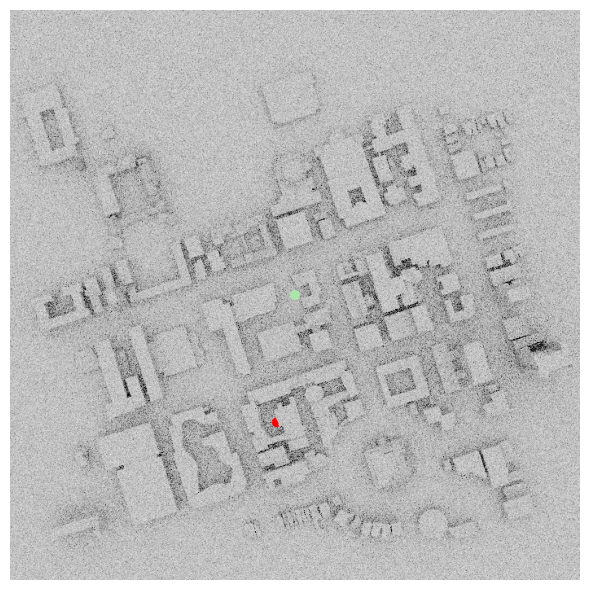

In [ ]:
scene.render(camera=my_cam, resolution=[700, 700], num_samples=2); # Increase num_samples to increase image quality

In [ ]:
# Create a measurement surface by cloning the terrain
# and elevating it by 1.5 meters
measurement_surface = scene.objects["merged-shapes"].clone(as_mesh=True)
transform_mesh(measurement_surface, translation=[0,0,1.5])

In [ ]:
# Instantiate the radio map solver
rm_solver = RadioMapSolver()

# Compute radio map using the mesh example

rm = rm_solver(scene,
               max_depth = 10,           # Maximum number of ray scene interactions
               samples_per_tx=10**8 , # If you increase: less noise, but more memory required
               cell_size=(5, 5),      # Resolution of the radio map
               center=[0, 0, 0],      # Center of the radio map
               size=[600, 600],       # Total size of the radio map
               orientation=[0, 0, 0]) # Orientation of the radio map, e.g., could be also vertical

rm2 = rm_solver(scene,
              max_depth=5,
              samples_per_tx=10**7,
              cell_size=(5, 5))

rm3 = rm_solver(scene,
               max_depth = 20,           # Maximum number of ray scene interactions
               samples_per_tx=10**8 , # If you increase: less noise, but more memory required
               cell_size=(5, 5),      # Resolution of the radio map
               center=[0, 0, 0],      # Center of the radio map
               size=[600, 600],       # Total size of the radio map
               orientation=[0, 0, 0]) # Orientation of the radio map, e.g., could be also vertical

rm4 = rm_solver(scene,
              max_depth=10,
              samples_per_tx=10**7,
              cell_size=(1, 1))


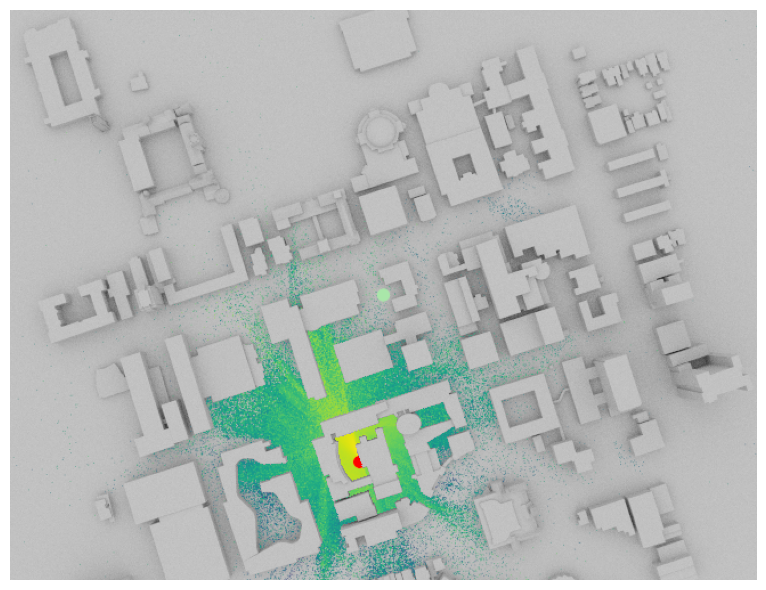

In [ ]:
scene.render(camera=my_cam, radio_map = rm4);

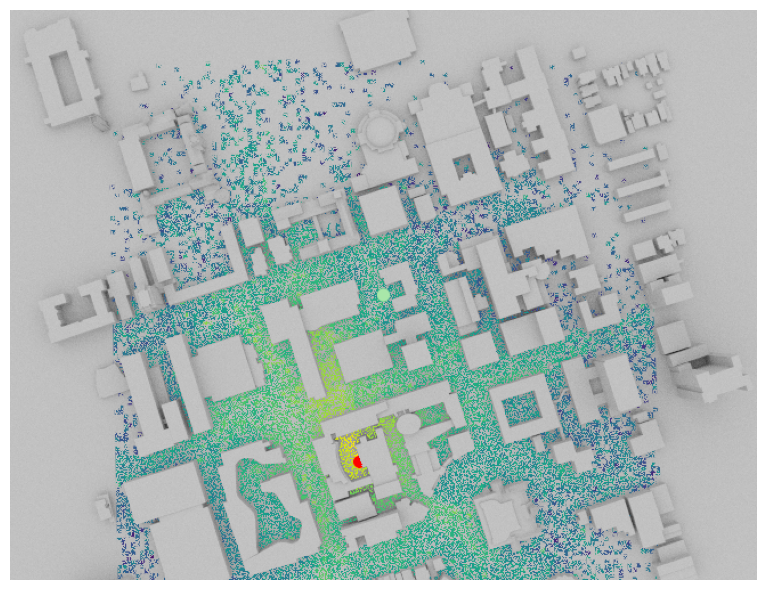

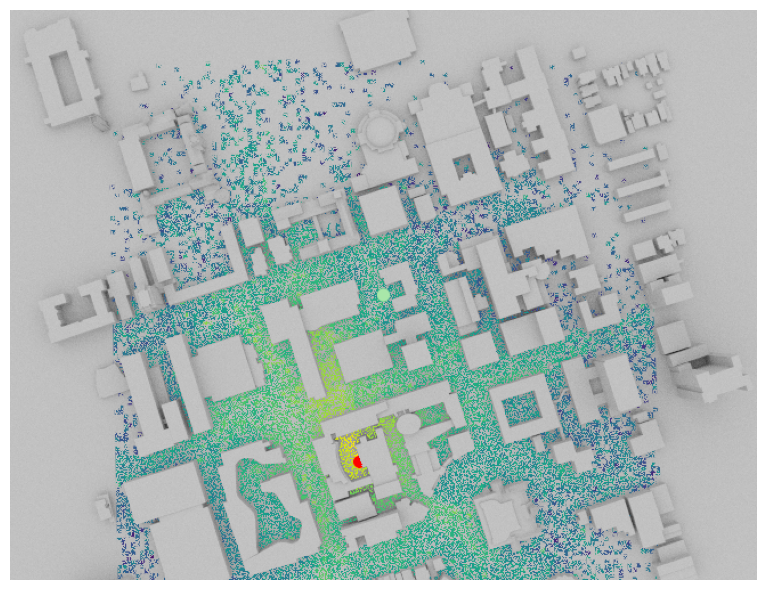

In [ ]:
scene.render(camera=my_cam, radio_map = rm3);

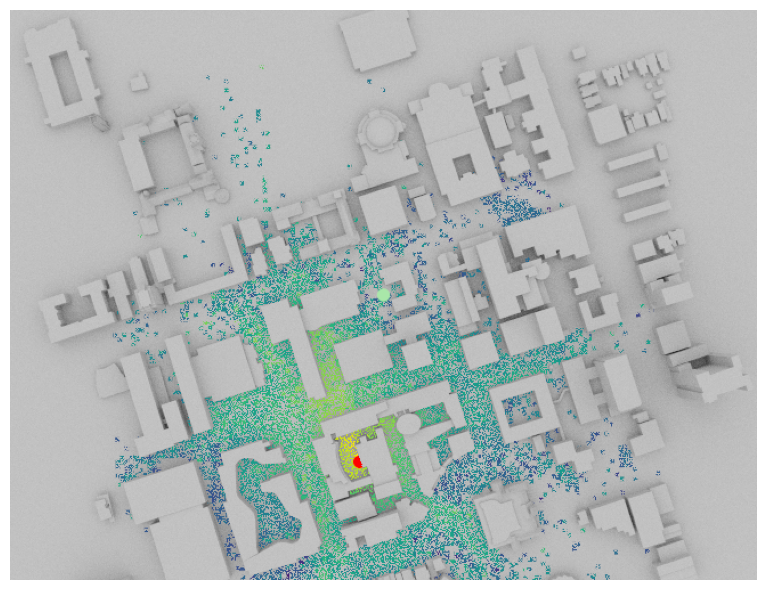

In [ ]:
scene.render(camera=my_cam,
                 radio_map=rm);

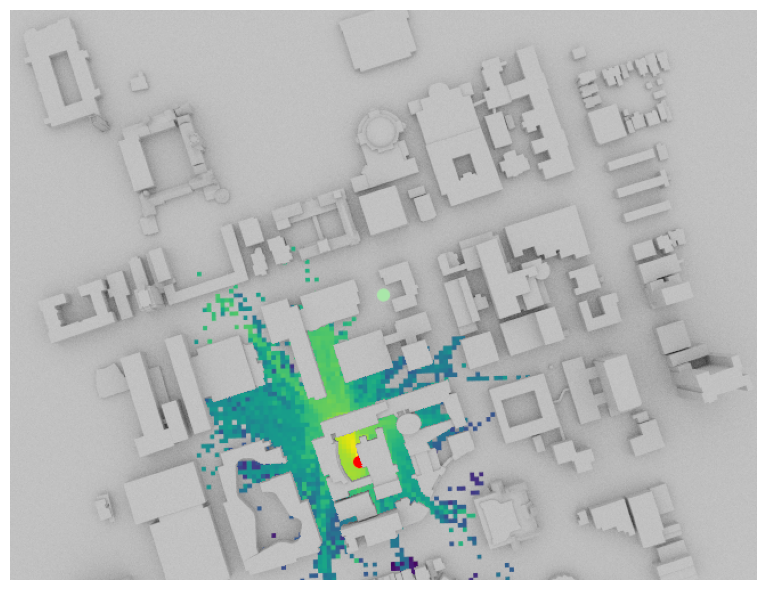

In [ ]:
scene.render(camera=my_cam,
                 radio_map=rm2);

In [4]:
rm.show(metric="rss");

NameError: name 'rm' is not defined